In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
users_df = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

In [3]:
# Merge ratings and movies data on MovieID
merged_df = pd.merge(ratings_df, movies_df, on='MovieID')
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [4]:
merged_df1 = merged_df.assign(Genres=merged_df['Genres'].str.split('|')).explode('Genres').reset_index(drop=True)

In [5]:
ratings = merged_df1.pivot_table(values='Rating', index='UserID', columns='Genres', aggfunc='mean')
ratings.head()

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
UserID,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.0,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.0,4.0,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.5,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.5,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.0,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000


In [6]:
ratings_array = ratings.to_numpy()
ratings_array[np.isnan(ratings_array)] = 0
print(ratings_array)

[[4.2        4.         4.11111111 ... 3.66666667 5.         0.        ]
 [3.5        3.73684211 0.         ... 3.48387097 3.73333333 4.33333333]
 [3.95652174 4.         4.         ... 3.8        4.         4.66666667]
 ...
 [3.         4.         3.66666667 ... 0.         4.         0.        ]
 [4.         4.1        3.61538462 ... 4.14285714 4.11111111 4.5       ]
 [2.97619048 2.81818182 3.         ... 3.92682927 3.69565217 4.        ]]


In [7]:
ratings_array[ratings_array == 0] = 2.5
print(ratings_array)

[[4.2        4.         4.11111111 ... 3.66666667 5.         2.5       ]
 [3.5        3.73684211 2.5        ... 3.48387097 3.73333333 4.33333333]
 [3.95652174 4.         4.         ... 3.8        4.         4.66666667]
 ...
 [3.         4.         3.66666667 ... 2.5        4.         2.5       ]
 [4.         4.1        3.61538462 ... 4.14285714 4.11111111 4.5       ]
 [2.97619048 2.81818182 3.         ... 3.92682927 3.69565217 4.        ]]


In [8]:
new_ratings_array=ratings_array[:6040, :]

In [9]:
aat = np.dot(new_ratings_array, new_ratings_array.T)
ata = np.dot(new_ratings_array.T, new_ratings_array)

## Function to perform QR algorithm to find eigenvalues

In [10]:
def qr_decomposition(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

In [11]:
def qr_algorithm_eigenvalues(A, num_iterations):
    n = A.shape[0]
    B = A.copy()
    eigenvalues = np.zeros(n)
    for _ in range(num_iterations):
        Q, R = qr_decomposition(B)
        B = np.dot(R, Q)
    for i in range(n):
        eigenvalues[i] = B[i, i]
    return eigenvalues

In [12]:
# Number of iterations for QR algorithm
num_iterations = 100

eigenvalues = qr_algorithm_eigenvalues(ata, num_iterations)
sqrt_eigenvalues = np.sqrt(eigenvalues)

In [13]:
print(sqrt_eigenvalues)

[1170.50078804   79.59180734   75.57988596   64.92827349   61.12110597
   57.66221788   55.21407569   53.38711737   49.13200646   46.78150513
   40.60023751   39.34681267   37.59729173   32.04974416   29.07846749
   25.95769878   22.31850138   21.04043081]


In [14]:
def create_diagonal_matrix(m, n, diagonal_values):
    
    diagonal_matrix = np.zeros((m, n))
    min_dim = min(m, n)

    for i in range(min_dim):
        diagonal_matrix[i, i] = diagonal_values[i]

    return diagonal_matrix

num_rows, num_cols = new_ratings_array.shape
    
m = num_rows
n = num_cols
sigma = create_diagonal_matrix(m, n, sqrt_eigenvalues)

In [15]:
print(sigma)

[[1170.50078804    0.            0.         ...    0.
     0.            0.        ]
 [   0.           79.59180734    0.         ...    0.
     0.            0.        ]
 [   0.            0.           75.57988596 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


## Normalizing Vectors

In [16]:
# Function to perform power iteration method
def power_iteration(A, num_iterations):
    n = A.shape[0]
    b_k = np.random.rand(n)
    for _ in range(num_iterations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    eigenvalue = np.dot(np.dot(b_k, A), b_k) / np.dot(b_k, b_k)
    return eigenvalue, b_k

In [17]:
# Function to find orthogonal eigenvectors
def find_orthogonal_eigenvectors(A, num_iterations, num_eigenvectors):
    eigenvectors = np.zeros((A.shape[0], num_eigenvectors))
    for i in range(num_eigenvectors):
        eigenvalue, eigenvector = power_iteration(A, num_iterations)
        eigenvectors[:, i] = eigenvector
        A -= eigenvalue * np.outer(eigenvector, eigenvector)
    return eigenvectors

In [18]:
num_iterations = 1000
num_eigenvectors = ata.shape[0]

V = find_orthogonal_eigenvectors(ata, num_iterations, num_eigenvectors)

VT=V.T

In [19]:
VTK = VT[:10, :]
sigmak = sigma[:10, :10]

In [20]:
sigma_k_inverse = np.linalg.inv(sigmak)

In [21]:
# Initialize a list to store the resulting 1x15 matrices for each row
result_list = []

next_ratings=ratings_array
V1=VTK.T

for row in ratings_array:
    # Perform matrix multiplication: (1x18) * (18x10) * (10x10)
    intermediate_result = np.dot(row, V1)
    final_result = np.dot(intermediate_result, sigmak)
    
    # Append the resulting 1x10 matrix to the result list
    result_list.append(final_result)

result_array = np.array(result_list)

print("Shape of the resulting array:", result_array.shape)
print(result_array)

Shape of the resulting array: (6040, 10)
[[ 1.84837455e+04 -1.78435090e+02 -3.49028278e+01 ... -2.43211142e+00
   2.94317097e+01 -7.32511495e+00]
 [ 1.67340446e+04  4.51567159e+01  9.69575314e+01 ...  1.79580552e+01
   2.38674675e+01  1.76755101e+00]
 [ 1.80765834e+04 -1.55770343e+02 -4.62601748e+01 ...  1.06608526e+01
  -1.56695475e+01  2.84465341e+01]
 ...
 [ 1.55449489e+04 -9.42039519e+01  3.45368285e+00 ...  3.67346662e+01
   3.46465244e+01  4.86097365e+01]
 [ 1.94106206e+04  2.02718052e+01  4.02601399e+01 ... -2.93568354e+00
   6.54052524e+00  3.94089182e+00]
 [ 1.80059848e+04  1.15018193e+02 -6.69116513e+01 ... -9.25596734e+00
  -4.79526199e+01 -9.45915120e+00]]


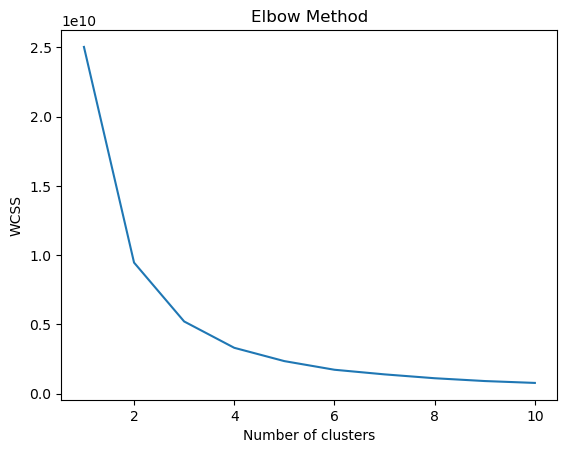

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(result_array)
    wcss.append(kmeans.inertia_)  

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X, labels)            
            if np.allclose(self.centroids, new_centroids):
                break            
            self.centroids = new_centroids
        
        self.labels_ = self._assign_labels(X)
    
    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

    
    
kmeans = KMeans(n_clusters=5)

kmeans.fit(result_array)

cluster_labels=kmeans.labels_
# Get cluster labels
print("Cluster labels:", cluster_labels)
print(cluster_labels.shape)

Cluster labels: [2 1 2 ... 4 2 2]
(6040,)


In [24]:
cluster_labels_with_index = [(index+1, cluster_id) for index, cluster_id in enumerate(cluster_labels)]

In [25]:
user_item_matrix = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')

In [26]:
user_item_matrix[np.isnan(user_item_matrix)] = 0

In [27]:
movies_not_rated_by_user=[]
movies_rated_by_user=[]
ratings_by_user=[]
people_in_same_cluster = []

target_user_id = 47

for col in user_item_matrix.columns:
    if user_item_matrix.loc[target_user_id, col]!=0:
        movies_rated_by_user.append(col)
        ratings_by_user.append([col,user_item_matrix.loc[target_user_id, col]])

for col in user_item_matrix.columns:
    if user_item_matrix.loc[target_user_id, col]==0:
        movies_not_rated_by_user.append(col)

# Identify users in the same cluster as the target user
target_user_cluster = cluster_labels[target_user_id - 1]

#Finding People in the same cluster as the target user
for user_id, cluster in cluster_labels_with_index:
    if cluster == target_user_cluster and user_id != target_user_id:
        people_in_same_cluster.append(user_id)

In [28]:
print(ratings_by_user)

[[17, 5.0], [34, 4.0], [36, 5.0], [58, 3.0], [249, 4.0], [318, 4.0], [527, 5.0], [593, 2.0], [608, 3.0], [858, 4.0], [902, 4.0], [1041, 5.0], [1089, 3.0], [1193, 4.0], [1208, 4.0], [1213, 4.0], [1221, 4.0], [1247, 4.0], [1949, 4.0], [1956, 4.0], [2406, 3.0], [2804, 4.0]]


## EXTRA

## Movies Rated By User (For Finding Error)

In [29]:
# Compute recommendations for movies not rated by the target user
import math

def special_round(num):
    if num - math.floor(num) >= 0.5:
        return math.ceil(num)
    else:
        return math.floor(num)
        
result_list2 = []

for movie in movies_rated_by_user:
    s = 0
    c = 0
    for user in people_in_same_cluster:
        if user_item_matrix.loc[user,movie] > 0:
            s += user_item_matrix.loc[user,movie]
            c += 1
    if c >=1:
        val = s / c
        result_list2.append([movie,val])

print(result_list2)

[[17, 3.75177304964539], [34, 3.5018867924528303], [36, 3.7011494252873565], [58, 3.75], [249, 3.58974358974359], [318, 4.457478005865102], [527, 4.326530612244898], [593, 4.155502392344498], [608, 3.9564102564102566], [858, 4.264406779661017], [902, 3.7264150943396226], [1041, 3.7288135593220337], [1089, 3.9513513513513514], [1193, 4.215613382899628], [1208, 4.03030303030303], [1213, 4.1203319502074685], [1221, 4.067796610169491], [1247, 3.9520958083832336], [1949, 3.962962962962963], [1956, 3.5569620253164556], [2406, 3.280952380952381], [2804, 4.0353535353535355]]


In [30]:
actual_values = np.array([item[1] for item in ratings_by_user])
predicted_values = np.array([item[1] for item in result_list2])

mse = np.mean((actual_values - predicted_values) ** 2)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.6118240723562978


## Making Predictions

In [31]:
# Compute recommendations for movies not rated by the target user
result_list = []

for movie in movies_not_rated_by_user:
    s = 0
    c = 0
    for user in people_in_same_cluster:
        if user_item_matrix.loc[user,movie] > 0:
            s += user_item_matrix.loc[user,movie]
            c += 1
    if c >= 10:
        val = s / c
        result_list.append([val,movie])

In [32]:
result_list.sort(key=lambda x: x[0], reverse=True)
print(result_list)

[[4.583333333333333, 1178], [4.35361216730038, 50], [4.333333333333333, 3470], [4.324675324675325, 2019], [4.2727272727272725, 2905], [4.266666666666667, 2607], [4.25, 3089], [4.240259740259741, 2324], [4.215346534653466, 2762], [4.189473684210526, 1204], [4.186915887850467, 1148], [4.181818181818182, 1046], [4.181818181818182, 3746], [4.178571428571429, 3307], [4.175438596491228, 922], [4.172413793103448, 913], [4.168539325842697, 745], [4.167630057803469, 750], [4.166666666666667, 2351], [4.16, 678], [4.153846153846154, 2360], [4.153846153846154, 3091], [4.1449044585987265, 2858], [4.139344262295082, 2329], [4.138888888888889, 1189], [4.133802816901408, 923], [4.127659574468085, 306], [4.123287671232877, 1223], [4.117647058823529, 1250], [4.116945107398568, 2028], [4.116071428571429, 904], [4.115151515151515, 908], [4.113095238095238, 1198], [4.111111111111111, 1233], [4.1020408163265305, 1212], [4.100961538461538, 260], [4.100840336134453, 1276], [4.1, 3188], [4.096774193548387, 121

In [33]:
top_5_movies = []

for val, movie_id in result_list[:5]:
    top_5_movies.append(movie_id)

print("Top 5 rated movie IDs:", top_5_movies)

Top 5 rated movie IDs: [1178, 50, 3470, 2019, 2905]


In [34]:
movie_id_to_name = dict(zip(movies_df['MovieID'], movies_df['Title']))

In [35]:
print(f"For User ID: {target_user_id}, recommended movies are: ")
for movie_id in top_5_movies:
    movie_name = movie_id_to_name.get(movie_id, "Unknown Movie")
    print(f"- Movie Name: {movie_name.ljust(40)}")

For User ID: 47, recommended movies are: 
- Movie Name: Paths of Glory (1957)                   
- Movie Name: Usual Suspects, The (1995)              
- Movie Name: Dersu Uzala (1974)                      
- Movie Name: Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
- Movie Name: Sanjuro (1962)                          


In [36]:
# Take user input for user ID
user_id_new = int(input("Enter User ID: "))

# Take the number of movies as input
num_movies = int(input("Enter the number of movies you want to rate: "))

# Create empty lists to store movie names and ratings
movie_names = []
ratings_new = []

# Use a loop to take input for each movie
for _ in range(num_movies):
    movie_name = input("Enter movie name: ")
    
    # Check if the entered movie name is in the DataFrame
    if movie_name in movies_df['Title'].values:
        rating = float(input(f"Enter rating for {movie_name}: "))
        movie_names.append(movie_name)
        ratings_new.append(rating)
    else:
        print(f"{movie_name} not found in the movie database. Please enter a valid movie name.")

# Create a DataFrame with user input
user_input_data = {'UserID': [user_id] * len(movie_names),
                   'MovieID': movies_df[movies_df['Title'].isin(movie_names)]['MovieID'].tolist(),
                   'Rating': ratings_new}

user_input_df = pd.DataFrame(user_input_data)

# Display the resulting DataFrame
print(user_input_df)

Enter User ID: 6041
Enter the number of movies you want to rate: 3
Enter movie name: Matrix, The (1999)
Enter rating for Matrix, The (1999): 4
Enter movie name: Silence of the Lambs, The (1991)
Enter rating for Silence of the Lambs, The (1991): 3.5
Enter movie name: Romeo and Juliet (1968)
Enter rating for Romeo and Juliet (1968): 4.5
   UserID  MovieID  Rating
0    6040      593     4.0
1    6040     2571     3.5
2    6040     3668     4.5


In [37]:
print(user_input_df)

   UserID  MovieID  Rating
0    6040      593     4.0
1    6040     2571     3.5
2    6040     3668     4.5


In [38]:
movie_ids_array = user_input_df['MovieID'].values

print(movie_ids_array)

[ 593 2571 3668]


In [39]:
genres_list = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Merge new user ratings with movies data
new_user_merged_df = pd.merge(user_input_df, movies_df, left_on='MovieID', right_on='MovieID')

# Explode genres and create a pivot table for the new user
new_user_genres_df = new_user_merged_df.assign(Genres=new_user_merged_df['Genres'].str.split('|')).explode('Genres').reset_index(drop=True)
new_user_ratings_pivot = new_user_genres_df.pivot_table(values='Rating', index='UserID', columns='Genres', aggfunc='mean')

# Fill NaN values with 0
new_user_ratings_pivot = new_user_ratings_pivot.fillna(0)

column_names_array = np.array(new_user_ratings_pivot.columns)

# Create an empty list to store the values
result_values = []

# Iterate through genres_list
for genre in genres_list:
    # Check if the genre is present in column_names_array
    if genre in column_names_array:
        # If present, append the corresponding value from the DataFrame
        result_values.append(new_user_ratings_pivot[genre].values[0])
    else:
        result_values.append(2.5)
        
# new_user_genere_matrix = np.array(result_values)
# user_genre_matrix = ratings_array

print(result_values)

[3.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 4.25, 2.5, 2.5, 2.5, 2.5, 2.5, 4.5, 3.5, 3.75, 2.5, 2.5]


In [40]:
ratings_array = np.vstack((ratings_array, result_values))

In [41]:
ratings_array.shape

(6041, 18)

In [42]:
# Initialize a list to store the resulting 1x15 matrices for each row
result_list = []

next_ratings=ratings_array
V1=VTK.T

for row in ratings_array:
    # Perform matrix multiplication: (1x18) * (18x10) * (10x10)
    intermediate_result = np.dot(row, V1)
    final_result = np.dot(intermediate_result, sigmak)
    
    # Append the resulting 1x10 matrix to the result list
    result_list.append(final_result)

result_array = np.array(result_list)

print("Shape of the resulting array:", result_array.shape)
print(result_array)

Shape of the resulting array: (6041, 10)
[[ 1.84837455e+04 -1.78435090e+02 -3.49028278e+01 ... -2.43211142e+00
   2.94317097e+01 -7.32511495e+00]
 [ 1.67340446e+04  4.51567159e+01  9.69575314e+01 ...  1.79580552e+01
   2.38674675e+01  1.76755101e+00]
 [ 1.80765834e+04 -1.55770343e+02 -4.62601748e+01 ...  1.06608526e+01
  -1.56695475e+01  2.84465341e+01]
 ...
 [ 1.94106206e+04  2.02718052e+01  4.02601399e+01 ... -2.93568354e+00
   6.54052524e+00  3.94089182e+00]
 [ 1.80059848e+04  1.15018193e+02 -6.69116513e+01 ... -9.25596734e+00
  -4.79526199e+01 -9.45915120e+00]
 [ 1.44106970e+04 -3.18228380e+01  5.66211278e+01 ...  9.51964823e-01
   2.14031147e+00  4.37992643e+00]]


In [43]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X, labels)            
            if np.allclose(self.centroids, new_centroids):
                break            
            self.centroids = new_centroids
        
        self.labels_ = self._assign_labels(X)
    
    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

    
    
kmeans = KMeans(n_clusters=5)

kmeans.fit(result_array)

cluster_labels=kmeans.labels_
# Get cluster labels
print("Cluster labels:", cluster_labels)
print(cluster_labels.shape)

Cluster labels: [1 2 1 ... 1 2 4]
(6041,)


In [44]:
cluster_labels_with_index = [(index+1, cluster_id) for index, cluster_id in enumerate(cluster_labels)]

In [45]:
print(len(cluster_labels_with_index))

6041


In [46]:
movies_not_rated_by_user=[]
movies_rated_by_user=[]
ratings_by_user=[]
people_in_same_cluster = []

target_user_id = user_id_new

for col in user_item_matrix.columns:
    if col not in movie_ids_array:
        movies_not_rated_by_user.append(col)

# Identify users in the same cluster as the target user
target_user_cluster = cluster_labels[target_user_id - 1]

#Finding People in the same cluster as the target user
for user_id, cluster in cluster_labels_with_index:
    if cluster == target_user_cluster and user_id != target_user_id:
        people_in_same_cluster.append(user_id)

In [47]:
# Compute recommendations for movies not rated by the target user
result_list = []

for movie in movies_not_rated_by_user:
    s = 0
    c = 0
    for user in people_in_same_cluster:
        if user<=6040 and user_item_matrix.loc[user,movie] > 0:
            s += user_item_matrix.loc[user,movie]
            c += 1
    if c >= 10:
        val = s / c
        result_list.append([val,movie])

In [48]:
print(result_list)

[[3.4201680672268906, 1], [2.6153846153846154, 2], [2.358490566037736, 3], [2.111111111111111, 4], [2.2580645161290325, 5], [3.3278688524590163, 6], [2.727272727272727, 7], [2.2, 8], [2.8507462686567164, 10], [3.0172413793103448, 11], [1.7894736842105263, 12], [1.75, 13], [2.8181818181818183, 14], [1.4761904761904763, 15], [3.25, 16], [3.388888888888889, 17], [2.8, 18], [1.8333333333333333, 19], [2.0, 20], [2.8105263157894735, 21], [2.4, 22], [2.0833333333333335, 23], [2.2711864406779663, 24], [3.1136363636363638, 25], [3.0, 26], [3.4615384615384617, 28], [3.6666666666666665, 29], [2.25, 31], [3.4835164835164836, 32], [3.020618556701031, 34], [3.2325581395348837, 36], [2.895348837209302, 39], [3.210526315789474, 41], [2.2758620689655173, 42], [2.8181818181818183, 43], [2.212121212121212, 44], [2.8857142857142857, 45], [2.7, 46], [3.59375, 47], [2.1470588235294117, 48], [4.141025641025641, 50], [3.0, 52], [3.6206896551724137, 58], [2.2666666666666666, 60], [2.95, 62], [2.692307692307692

In [49]:
result_list.sort(key=lambda x: x[0], reverse=True)
print(result_list)

[[4.190476190476191, 745], [4.173913043478261, 922], [4.170212765957447, 318], [4.141025641025641, 50], [4.071428571428571, 1223], [4.054054054054054, 923], [4.042105263157895, 858], [4.0, 307], [4.0, 3730], [4.0, 3949], [3.989795918367347, 296], [3.980392156862745, 2692], [3.976923076923077, 2762], [3.972972972972973, 1148], [3.9545454545454546, 1449], [3.95, 3435], [3.9473684210526314, 1260], [3.943127962085308, 2858], [3.9302325581395348, 1199], [3.9166666666666665, 1244], [3.9166666666666665, 3134], [3.896551724137931, 899], [3.882978723404255, 1193], [3.8823529411764706, 306], [3.8793103448275863, 750], [3.8773584905660377, 1198], [3.875, 3852], [3.8666666666666667, 1300], [3.8636363636363638, 3000], [3.863013698630137, 1213], [3.857142857142857, 1284], [3.857142857142857, 3783], [3.8518518518518516, 1221], [3.8448275862068964, 527], [3.8421052631578947, 1041], [3.8392857142857144, 3897], [3.8333333333333335, 1176], [3.8333333333333335, 2575], [3.8285714285714287, 1262], [3.82, 12

In [50]:
top_5_movies = []

for val, movie_id in result_list[:5]:
    top_5_movies.append(movie_id)

print("Top 5 rated movie IDs:", top_5_movies)

Top 5 rated movie IDs: [745, 922, 318, 50, 1223]


In [51]:
print(f"For User ID: {target_user_id}, recommended movies are: ")
for movie_id in top_5_movies:
    movie_name = movie_id_to_name.get(movie_id, "Unknown Movie")
    print(f"- Movie Name: {movie_name.ljust(40)}")

For User ID: 6041, recommended movies are: 
- Movie Name: Close Shave, A (1995)                   
- Movie Name: Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
- Movie Name: Shawshank Redemption, The (1994)        
- Movie Name: Usual Suspects, The (1995)              
- Movie Name: Grand Day Out, A (1992)                 
